In [26]:
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline

In [27]:
# looking into crash days and time

In [89]:
df = pd.read_csv(r'../../Machine Learning/Data Incubator/Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\Lenovo\Anaconda3\envs\cs231n\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [91]:
df = df[(df['CRASH DATE'] >= '2017-01-01') & (df['CRASH DATE'] < '2019-01-01')].reset_index(drop=True)

In [92]:
df = df.set_index('CRASH DATE')

In [93]:
df.head()

,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
CRASH DATE,,,,,,,,,,,,,,,,,,,,,
2018-11-27,14:50,BROOKLYN,11207,40.683730,-73.890450,POINT (-73.89045 40.68373),NaN,NaN,341 HIGHLAND BOULEVARD,0.0,...,Unspecified,NaN,NaN,NaN,4047436,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2018-11-27,21:30,QUEENS,11378,40.729343,-73.902626,POINT (-73.902626 40.729343),63 STREET,53 DRIVE,NaN,0.0,...,NaN,NaN,NaN,NaN,4033942,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2018-11-28,14:30,NaN,NaN,40.680313,-73.842026,POINT (-73.842026 40.680313),ROCKAWAY BOULEVARD,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4034329,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2018-11-26,16:22,NaN,NaN,40.766340,-73.894165,POINT (-73.894165 40.76634),GRAND CENTRAL PKWY,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4033186,Sedan,Sedan,NaN,NaN,NaN
2018-11-26,23:17,NaN,NaN,40.767117,-73.956505,POINT (-73.956505 40.767117),EAST 71 STREET,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4033381,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [94]:
df1 = df.groupby('CRASH DATE').count()

In [95]:
df1

,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
CRASH DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,485,313,313,462,462,462,383,250,101,485,...,375,44,13,5,485,478,343,41,13,5
2017-01-02,449,275,275,434,434,434,367,226,82,449,...,356,28,5,3,449,437,328,25,4,2
2017-01-03,659,394,394,622,622,622,541,340,116,659,...,522,40,6,0,659,647,491,36,6,0
2017-01-04,590,376,376,554,554,554,450,290,139,590,...,489,43,8,1,590,586,462,42,8,1
2017-01-05,552,357,357,522,522,522,431,281,120,552,...,491,35,10,2,552,549,454,32,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,582,392,392,536,536,536,429,290,153,582,...,495,43,11,2,582,580,470,42,11,1
2018-12-28,681,449,449,612,612,612,533,368,148,681,...,535,34,10,5,681,668,514,34,9,5
2018-12-29,499,315,315,462,462,462,387,263,112,499,...,414,38,5,2,499,494,385,37,5,2


In [96]:
df1['CRASH TIME']

CRASH DATE
2017-01-01    485
2017-01-02    449
2017-01-03    659
2017-01-04    590
2017-01-05    552
             ... 
2018-12-27    582
2018-12-28    681
2018-12-29    499
2018-12-30    404
2018-12-31    622
Name: CRASH TIME, Length: 730, dtype: int64

In [97]:
df1['CRASH TIME'].rolling(2).sum()

CRASH DATE
2017-01-01       NaN
2017-01-02     934.0
2017-01-03    1108.0
2017-01-04    1249.0
2017-01-05    1142.0
               ...  
2018-12-27    1096.0
2018-12-28    1263.0
2018-12-29    1180.0
2018-12-30     903.0
2018-12-31    1026.0
Name: CRASH TIME, Length: 730, dtype: float64

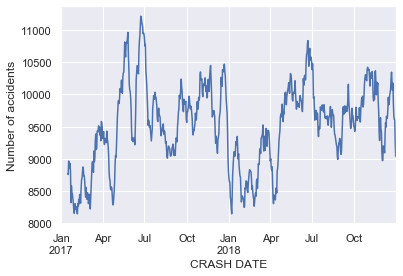

In [98]:
# using a 15 days moving average
df1['CRASH TIME'].rolling(15).sum().plot()
plt.ylabel('Number of accidents');